# Basic exercises for using matplotlib

by B. H. K. Yung

*Workshop on: "Python and astro-statistics",
Institute of Physics NCU, Toruń<br>
27-30 June, 2016*


## Question 1
Plot the given fake H$_{2}$O maser VLBI map data (data\_VLBI-map.dat). There are four columns in the file. Columns 1 and 2 give the offset positions (R.A. offset and Dec. offset) of the maser features with respect to an arbitrary point in milliarseconds (mas). Columns 3 and 4 give the local-standard-of-rest velocity, $V_{\rm LSR}$, in km s$^{-1}$, and the peak flux in Jy, for each maser feature. The sizes of the markers plotted are to be proportional to the fluxes.

Hints: 
In addition to the common commands, you may wish to look up for the following functions or keywords.
- scatter(), cmap
- colorbar(), set\_label()
- set\_xlabel(), set\_ylabel()
- tick\_params()
- minorticks\_on()

In [1]:
### Importing libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
### Read the data file (assuming the data file is in the current directory) and store data in different lists
### "unpack=True" is needed for storing data in corresponding lists as show below
### "skiprows=2" is used for skipping to the two header lines of our data file
RA_off, Dec_off, Vlsr, Flux = np.loadtxt('data_VLBI-map.dat', delimiter='|', usecols=(0,1,2,3), unpack=True, skiprows=2)

In [3]:
### This cell does the same as the above, but in a more primitive manner which does not involve numpy's functions
###
### Read the data file (assuming the data file is in the current directory)
#f = open('data_VLBI-map.dat').readlines()

### Store data in corresponding lists
#RA_off = []
#Dec_off = []
#Vlsr = []
#Flux = []
#for line in f:
#   if line[0] != '#':  ## <-- To skip the comment lines of the file
#      RA_off.append(float(line.split('|')[0])) ## <-- Here the delimiter is '|', if no arg then it means any space
#      Dec_off.append(float(line.split('|')[1]))
#      Vlsr.append(float(line.split('|')[2]))
#      Flux.append(float(line.split('|')[3]))

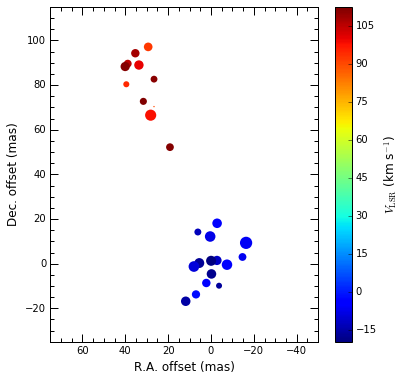

In [4]:
### Plotting
fig, ax = plt.subplots(figsize=(6,6))
map = ax.scatter(RA_off, Dec_off, c=Vlsr, cmap='jet', vmin=min(Vlsr), vmax=max(Vlsr), edgecolor='none', s=np.multiply(30, Flux))

### Colourbar settings
cbar = fig.colorbar(map)
cbar.set_label(label=r'$V_{\rm LSR}$ (km s$^{-1}$)', size=12)
cbar.ax.tick_params(labelsize=10)

### Axis settings
ax.set_xlabel('R.A. offset (mas)', fontsize=12)
ax.set_ylabel('Dec. offset (mas)', fontsize=12)
ax.axis([75, -50, -35, 115], 'equal') ## <-- Note that the R.A. axis is reversed
ax.tick_params(which='major', length=8, width=1, labelsize=10)
ax.tick_params(which='minor', length=4, width=1)
ax.minorticks_on()

### Save the plot
fig.savefig('fig_VLBI-map.eps')

## Question 2
Plot the given real baseline-subtracted spectra of OH maser (in 1612 and 1665 MHz) in three different ways. The two columns of the file give the $V_{\rm LSR}$ and flux in Jy for each spectral channel.

(a) Plot the 1612 MHz spectrum only (data\_1612-spec.dat). The baseline root-mean-square (rms) noise of this spectrum is 0.01 Jy. Indicate the blue- and red- shifted peaks with the corresponding colours, and the rest of the spectral curve in black. For simplicity, consider the following conditions for this particular scenario.
- Only the line features with fluxes larger than or equal to 3 times the rms (i.e. 3$\sigma$) are real emission features which require shading in blue or red.
- The systemic velocity of the object is found to be 4 km s$^{-1}$, so the line features with $V_{\rm LSR}$ < 4 km s$^{-1}$ are considered as blue-shifted, while those with $V_{\rm LSR}$ > 4 km s$^{-1}$ are red-shifted.

Hints: You may have to use the **if** and **else** statements and the text() function.

In [5]:
### Read the 1612 MHz data file
f_1612 = open('data_1612-spec.dat').readlines()

### Store data in corresponding lists
Vel_1612 = []
Flux_1612 = []
for line in f_1612:
   Vel_1612.append(float(line.split()[0])) ## <-- Here the delimiter is a space character
   Flux_1612.append(float(line.split()[1]))

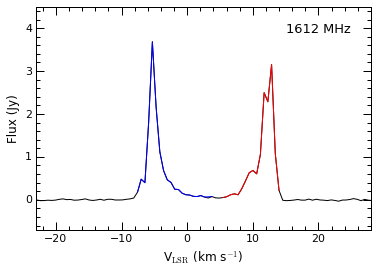

In [6]:
## Plotting
## The easier way is to first plot the whole curve in black, and then cover the required regions with red and blue
fig, ax = plt.subplots()
ax.plot(Vel_1612, Flux_1612, c='k')

## Axis settings
ax.axis([-23, 28, -0.7, 4.5])
ax.set_xlabel(r'V$_{\rm LSR}$ (km s$^{-1}$)', fontsize=12)
ax.set_ylabel('Flux (Jy)', fontsize=12)
ax.tick_params(which='major', length=8, width=1, labelsize=11)
ax.tick_params(which='minor', length=4, width=1)
ax.minorticks_on()

## If you wish you can run only the above part of the code to see how the spectrum looks.

## Cover the peaks with corresponding red and blue curves
## We create new lists to store the "blue" and "red" ranges of data for convenience sake (though not memory effective)
rms = 0.01
Vel_1612_blue = []
Flux_1612_blue = []
Vel_1612_red = []
Flux_1612_red = []
for i in range(len(Vel_1612)): ## <-- Same if you use len(Flux_1612)
   if Vel_1612[i] < 4 and Vel_1612[i] > -23 and Flux_1612[i] >= (5*rms):
      Vel_1612_blue.append(Vel_1612[i])
      Flux_1612_blue.append(Flux_1612[i])
   elif Vel_1612[i] > 4 and Vel_1612[i] < 28 and Flux_1612[i] >= (5*rms):
      Vel_1612_red.append(Vel_1612[i])
      Flux_1612_red.append(Flux_1612[i])

ax.plot(Vel_1612_blue, Flux_1612_blue, c='b');
ax.plot(Vel_1612_red, Flux_1612_red, c='r');

## Add text, the numbers gives the (x,y) coordinates of the lower-left corner of the textbox
ax.text(15, 3.9, '1612 MHz', size=13);

### Save the plot
fig.savefig('fig_1612-spec_coloured.eps')

(b) Plot the 1612 and 1665 MHz (data\_1665-spec.dat) spectra in two subplots, with the 1612 MHz one above. The two spectra should share the velocity axis.

In [7]:
### Read the 1665 data file and store data in lists
f_1665 = open('data_1665-spec.dat').readlines()

Vel_1665 = []
Flux_1665 = []
for line in f_1665:
   Vel_1665.append(float(line.split()[0]))
   Flux_1665.append(float(line.split()[1]))

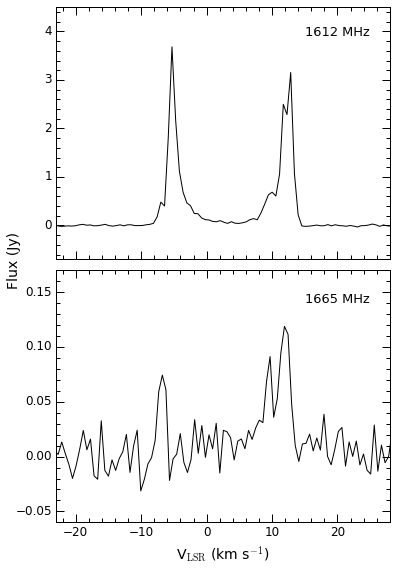

In [8]:
## Plotting
fig, axes = plt.subplots(2, sharex=True, figsize=(5.5,8)) ## <-- Axes is a list containing two subplot objects
axes[0].plot(Vel_1612, Flux_1612, c='k')
axes[1].plot(Vel_1665, Flux_1665, c='k')

## Axis settings, note how the shared y-label could be made up using text()
axes[0].axis([-23, 28, -0.7, 4.5])
axes[1].axis([-23, 28, -0.06, 0.17])  ## <--- x-axis is shared, its newest change applies to both subplots
axes[1].set_xlabel(r'V$_{\rm LSR}$ (km s$^{-1}$)', fontsize=14)
axes[1].text(-30.5, 0.195, 'Flux (Jy)', size=14, rotation=90)

## Add text
axes[0].text(15, 3.9, '1612 MHz', size=13);
axes[1].text(15, 0.14, '1665 MHz', size=13);

for ax in axes:
   ax.tick_params(which='major', length=8, width=1, labelsize=12)
   ax.tick_params(which='minor', length=4, width=1)
   ax.minorticks_on()

## Optimize the separation between the subplots for better appearance
fig.tight_layout()

### Save the plot
fig.savefig('fig_1612+1665-spec_two-panels.eps')

(c) Plot both the 1612 and 1665 MHz lines in one panel, but with different colours. The weaker 1665 MHz line is needed to be scale up by a certain factor (e.g., 20) for proper display.

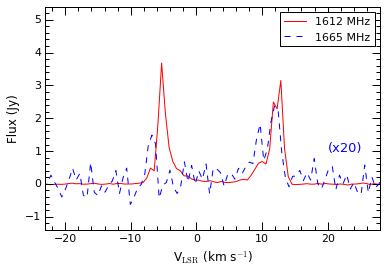

In [9]:
## Plotting
factor = 20

fig, ax = plt.subplots()
ax.plot(Vel_1612, Flux_1612, c='r', label='1612 MHz')
ax.plot(Vel_1665, np.multiply(Flux_1665, factor), c='b', ls='--', label='1665 MHz')

## Axis settings
ax.axis([-23, 28, -1.4, 5.4])
ax.set_xlabel(r'V$_{\rm LSR}$ (km s$^{-1}$)', fontsize=12)
ax.set_ylabel('Flux (Jy)', fontsize=12)
ax.tick_params(which='major', length=8, width=1, labelsize=11)
ax.tick_params(which='minor', length=4, width=1)
ax.minorticks_on()

## Add legend
ax.legend(numpoints=1, loc='upper right', fontsize=11);

## Add text
ax.text(20, 1, '(x'+str(factor)+')', color='b', size=13);

### Save the plot
fig.savefig('fig_1612+1665-spec_overlapped.eps')

## Question 3

Plot the fake data and model curve (data\_power2.dat) together with the error bars. Add a residual plot in another panel below. The model curve is assumed to be $y=x^{2}$. 

Hints: You may have to use the following functions.
- GridSpec()
- add_subplot()
- errorbar()
- set_xticklabels()
- set_yticks()
- set_title()

In [10]:
### Read the data file
f = open('data_power2.dat').readlines()

### Store data in corresponding lists
X = []
Y = []
Y_err = []
for line in f:
   if line[0] != '#':  ## <-- To skip the comment lines of the file
      X.append(float(line.split()[0])) ## <-- Here the delimiter is a <TAB>
      Y.append(float(line.split()[1]))
      Y_err.append(float(line.split()[2]))

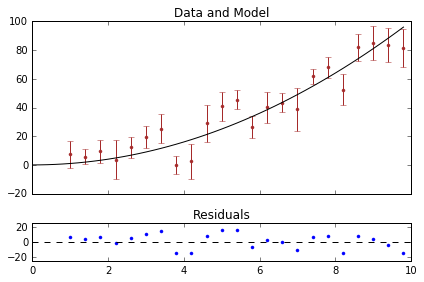

In [11]:
## Plotting
fig = plt.figure() ## <-- Note that here we use figure(), and will add subplots later
gs = plt.GridSpec(4,1)
ax1 = fig.add_subplot(gs[:3, :])
ax2 = fig.add_subplot(gs[3, :])

## The data including error bars
ax1.errorbar(X, Y, yerr=Y_err, fmt='.', c='brown');
## The y=x^2 model curve
X_m = np.arange(0, 10, 0.2)
Y_m = X_m**2 ## <-- Some element-wise operations could be done as simple as this
ax1.plot(X_m, Y_m, 'k',)

## Residuels
Y_res = np.subtract(Y, np.asarray(X)**2) ## <-- Turn "normal" list into numpy array
ax2.plot(X, Y_res, '.', c='b')

## Axis settings
ax1.axis([0, 10, -20, 100]);
ax1.set_xticklabels([]);
ax1.set_title('Data and Model');
ax2.axis([0, 10, -25, 25]);
ax2.set_yticks([-20, 0, 20]);
ax2.set_title('Residuals');

## Add a y=0 line to the residuel plot for illustration purpose
ax2.plot([0, 10], [0, 0], c='k', ls='--');

## Better appearance
fig.tight_layout()

### Save the plot
fig.savefig('fig_power2.eps')